In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import altair as alt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('webmd.csv')
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [ ]:
df.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [ ]:
df.drop(['Date','UsefulCount','EaseofUse'], axis=1, inplace = True)

In [ ]:
df['Satisfaction'].value_counts()

5     111550
1     100901
4      63158
3      51852
2      35342
6          2
10         1
Name: Satisfaction, dtype: int64

In [ ]:
df['Sex'].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

In [ ]:
df['Age'].value_counts()

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [ ]:
for col in df.columns:
    if df[col].dtype.kind == "O":
        df[col] = df[col].str.strip()

In [ ]:
df['Sex'].replace('', np.nan, inplace=True)
df['Age'].replace('', np.nan, inplace=True)
df['Sides'].replace('', np.nan, inplace=True)
df['Condition'].replace('', np.nan, inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315578 entries, 0 to 362805
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            315578 non-null  object
 1   Condition      315578 non-null  object
 2   Drug           315578 non-null  object
 3   DrugId         315578 non-null  int64 
 4   Effectiveness  315578 non-null  int64 
 5   Reviews        315578 non-null  object
 6   Satisfaction   315578 non-null  int64 
 7   Sex            315578 non-null  object
 8   Sides          315578 non-null  object
dtypes: int64(3), object(6)
memory usage: 24.1+ MB


In [ ]:
df.nunique()

Age                  11
Condition          1639
Drug               5278
DrugId             4771
Effectiveness         6
Reviews          216182
Satisfaction          6
Sex                   2
Sides              1616
dtype: int64

In [ ]:
drugs = {}
for drugid, drug in df[["DrugId", "Drug"]].itertuples(index=False):
    drugs.setdefault(drugid, set()).add(drug)
drugs = {k:list(v) for k,v in drugs.items()}

drugs_with_more_names = {k:list(v) for k,v in drugs.items() if len(v) > 1}
for k,v in dict(itertools.islice(drugs_with_more_names.items(), 10)).items():
    print(f"{k:10}: {list(v)[:2]}")

    167493: ['lynparza tablet', 'lynparza']
      7286: ['loteprednol etabonate drops, suspension', 'loteprednol etabonate drops, gel']
      7319: ['lotemax drops, gel', 'lotemax ointment']
    164437: ['lorcaserin tablet', 'lorcaserin tablet, extended release 24 hr']
      8892: ['lorazepam concentrate', 'lorazepam']
     76548: ['loratadine-d', 'loratadine d']
        73: ['loratadine tablet,disintegrating', 'loratadine']
      8555: ['loprox suspension, topical', 'loprox cream']
      4789: ['loperamide', 'loperamide liquid']
      5887: ['lithium carbonate', 'lithium carbonate er']


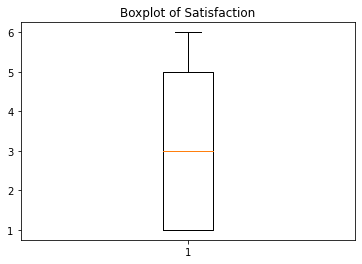

In [ ]:
plt.boxplot(df['Satisfaction'])
plt.title("Boxplot of Satisfaction")
plt.show()

In [ ]:
index_values = df[(df['Satisfaction'] > 5)].index
index_values

Int64Index([195073, 195282], dtype='int64')

In [ ]:
df.drop([195073, 195282], axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
def relabel(x):
    return 0 if x < 3 else 1 if x == 3 else 2

df["Satisfaction"] = df["Satisfaction"].apply(relabel)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data = (df.groupby(["Age", "Satisfaction"])
          .agg({"Reviews": "count"})
          .reset_index()).sort_values(["Age", "Satisfaction"], ascending=True)
#data['Cumulative_Reviews'] = data.groupby(['Age'])['Reviews'].apply(lambda x: x.cumsum())

bars = (alt.Chart(data=data, title="Distribution of Reviews Over Age")
           .mark_bar(size=40,
                     strokeWidth=0.5,
                     stroke="white")
           .encode(x=alt.X('Age:O',
                           axis=alt.Axis(title="Age groups", grid=False)),
                   y=alt.Y('Reviews:Q', stack='zero',
                           scale=alt.Scale(type="linear"),
                           axis=alt.Axis(title="num of reviews")),
                   order=alt.Order('Satisfaction', sort='ascending'),
                   color=alt.Color("Satisfaction:Q",
                                   scale=alt.Scale(scheme="lightgreyteal",
                                                   bins=[0,1,2,3],
                                                   reverse=False))))
                   
chart = (alt.layer(bars)
            .configure(background="#11043a")
            .configure_title(font="Arial",
                             fontSize=18,
                             color="#e6f3ff",
                             dy=-10)
            .configure_legend(titleFontSize=12,
                              titleColor="white",
                              tickCount=10,
                              titleOpacity=0.8,
                              labelColor="white",
                              labelOpacity=0.7,
                              titlePadding=10)
            .configure_axis(titleFontSize=13,
                            titlePadding=20,
                            titleColor="white",
                            titleOpacity=0.8,
                            labelColor="white",
                            labelOpacity=0.7,
                            labelAngle=0,
                            tickOffset=0,
                            grid=True,
                            gridOpacity=0.15)
            .configure_view(strokeWidth=0)
            .properties(height=300, width=700)
)
chart

alt.LayerChart(...)

In [ ]:
pd.crosstab(df['Age'],df['Effectiveness'])

Effectiveness,1,2,3,4,5
Age,,,,,
0-2,95,38,85,86,126
13-18,1074,628,1039,1543,2246
19-24,3151,1641,3290,5182,9356
25-34,6849,3442,7296,10763,18284
3-6,166,85,119,148,215
35-44,7749,4002,8353,11652,19108
45-54,11309,6142,11987,16947,25980
55-64,10700,5822,11275,14986,22746
65-74,5879,3431,6291,7926,11611


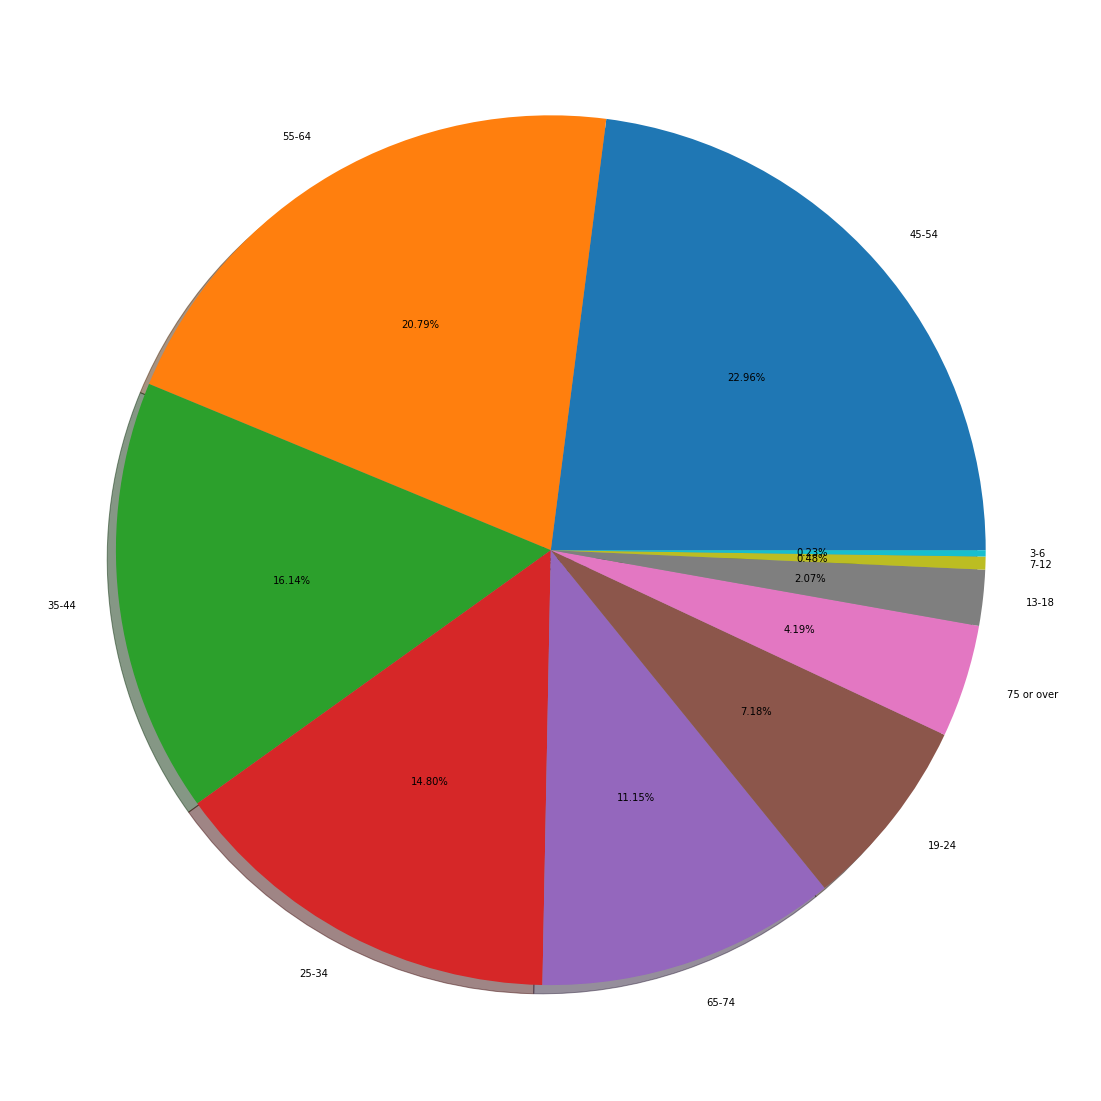

In [ ]:
plt.figure(figsize=(20,20))
l=df['Age'].value_counts().nlargest(10)
plt.pie(l,labels=l.index,shadow=True, textprops={'fontsize': 10},autopct='%1.2f%%')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
a=['Condition']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])

0                              Stuffy Nose
1                            Cold Symptoms
6                            Birth Control
7            Disease of Ovaries with Cysts
8                                     Acne
                        ...               
360515            Medullary Thyroid Cancer
360680                Inadequate Vitamin C
361078       Hiccups that are Hard to Cure
361112    Combative and Explosive Behavior
361545                      Lead Poisoning
Name: Condition, Length: 1639, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
a=['Age']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])

0       75 or over
1            25-34
7            45-54
9            55-64
13           19-24
26           35-44
55           13-18
122          65-74
3254          7-12
4682           0-2
4730           3-6
Name: Age, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
a=['Sex']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])

0      Male
1    Female
Name: Sex, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
a=['Sides']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])

0         Drowsiness,  dizziness ,  dry mouth /nose/thro...
6         Nausea ,  vomiting ,  headache ,  bloating ,  ...
9         Temporary burning, stinging, dryness in the no...
13        Nausea ,  vomiting ,  headache ,  bloating ,  ...
30        Constipation ,  diarrhea , or  upset stomach  ...
                                ...                        
361078    Drowsiness,  dizziness ,  lightheadedness ,  d...
361080    Nausea , loss of appetite,  diarrhea ,  vomiti...
361289    Blurred vision ,  nausea ,  vomiting , abdomin...
361335    Drowsiness,  dizziness ,  nausea ,  constipati...
361387    Drowsiness,  dizziness ,  dry mouth ,  blurred...
Name: Sides, Length: 1616, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


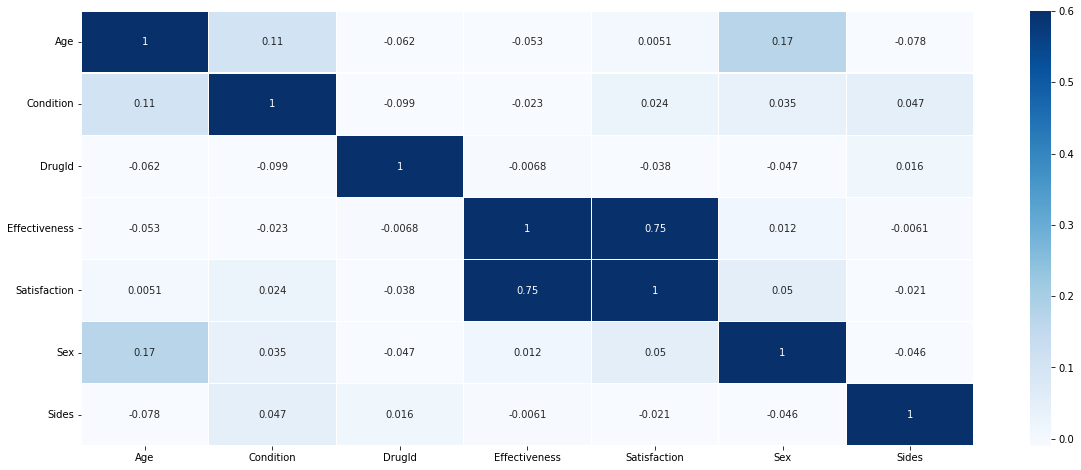

In [ ]:
corrmatrix = df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.01,vmax=0.6,annot=True,linewidths=0.2,cmap='Blues')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315576 entries, 0 to 362805
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            315576 non-null  int64 
 1   Condition      315576 non-null  int64 
 2   Drug           315576 non-null  object
 3   DrugId         315576 non-null  int64 
 4   Effectiveness  315576 non-null  int64 
 5   Reviews        315576 non-null  object
 6   Satisfaction   315576 non-null  int64 
 7   Sex            315576 non-null  int64 
 8   Sides          315576 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 24.1+ MB


In [ ]:
y = df['Sides']
x = df.drop(['Sides','Satisfaction','Reviews','Drug'], axis=1)

In [ ]:
#Standardization
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)
x = pd.DataFrame(x)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
#Decision Tree 

from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,f1_score
print('accuracy is: ',round(accuracy_score(y_test,y_pred),4))
print('Precision is: ',round(precision_score(y_test,y_pred,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,y_pred,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,y_pred,average='micro'),4))

accuracy is:  0.9056
Precision is:  0.9056
recall score is:  0.9056
f1 score is:  0.9056
